In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import seaborn as sns
%pylab inline
import requests, re
import pandas as pd
import seaborn as sns
import nltk

import string, itertools
from collections import Counter, defaultdict
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from sklearn.cluster import KMeans

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# User data

In [3]:
import pandas as pd
import json

data_list = []

with open('../../yelp_academic_dataset_user.json', 'r') as file:
    for line in file:
        data_list.append(json.loads(line))

user = pd.DataFrame(data_list)


In [4]:
user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [5]:
user.shape

(1987897, 22)

In [6]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


In [7]:
user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


# Analysis on business.json

In [4]:
import pandas as pd
import json

# The path to your file
file_path = '../../yelp_academic_dataset_business.json'

# This will store the entire content of the JSON file
data = {}

try:
    with open(file_path, 'r') as file:
        data = json.load(file)  # This parses the entire file content as JSON
except FileNotFoundError:
    print(f"The file {file_path} does not exist.")
except json.JSONDecodeError:
    print(f"There was an error reading the JSON data from {file_path}.")


data_list = [{'id': key, 'query': value} for key, value in data.items()]

# Now, create a DataFrame from the list of dictionaries
business = pd.DataFrame(data_list)




There was an error reading the JSON data from ../../yelp_academic_dataset_business.json.


In [5]:
import pandas as pd
import json

data_list = []

with open('../../yelp_academic_dataset_business.json', 'r') as file:
    for line in file:
        # Load each line as a JSON object and append to the list
        data_list.append(json.loads(line))


business = pd.DataFrame(data_list)

In [6]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [11]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


# Total number of business id  which as has only resturants as category

In [11]:
restaurant_businesses = business[business['categories'].str.contains('Restaurants', case=False, na=False)]


restaurant_ids = restaurant_businesses['business_id']


In [12]:
number_of_restaurant_ids = len(restaurant_ids)
print(number_of_restaurant_ids)    # 52268


52268


# Review data

#  Dividing and Exporting Shuffled Reviews into Equal Parts

In [13]:
import pandas as pd
import json

data_list = []


with open('../../yelp_academic_dataset_review.json', 'r') as file:
    for line in file:
        # Load each line as a JSON object and append to the list
        data_list.append(json.loads(line))


review  = pd.DataFrame(data_list)



review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [14]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


In [15]:
print(review.count())


review_id      6990280
user_id        6990280
business_id    6990280
stars          6990280
useful         6990280
funny          6990280
cool           6990280
text           6990280
date           6990280
dtype: int64


In [27]:
review.describe()

,stars,useful,funny,cool
count,6.990280e+06,6.990280e+06,6.990280e+06,6.990280e+06
mean,3.748584e+00,1.184609e+00,3.265596e-01,4.986175e-01
std,1.478705e+00,3.253767e+00,1.688729e+00,2.172460e+00
min,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,1.182000e+03,7.920000e+02,4.040000e+02


In [22]:
review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [16]:
review.shape

(6990280, 9)

# business IDs for restaurants that are present in the review data

In [17]:
# Now, filter the review data based on these restaurant_ids
filtered_reviews = review[review['business_id'].isin(restaurant_ids)]


In [18]:
filtered_reviews.head() 

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31


In [19]:
filtered_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4724471 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 360.4+ MB


In [20]:
len(filtered_reviews)   # 4724471

4724471

In [21]:
shuffled_reviews = filtered_reviews.sample(frac=1).reset_index(drop=True)


split_size = len(shuffled_reviews) // 5
chunks = [shuffled_reviews.iloc[i:i + split_size] for i in range(0, len(shuffled_reviews), split_size)]


for idx, chunk in enumerate(chunks, 1):
    chunk.to_csv(f"filtered_reviews_part_{idx}.csv", index=False)


#  Part-1

In [61]:
# part1:

df1= pd.read_csv("filtered_reviews_part_1.csv")
df1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,T1iMdZeNzNRGB2SW_GYb-Q,Xy_6tT8l0Y5JNrSbL3_4uw,6PCHwjpYRMo1ZvY8m91bIg,3.0,1,0,0,If I were rating this place a few months ago i...,2015-12-29 22:09:28
1,y4GTzdMEgbMCnLSB3tvnMA,xUinwQIaC7G4B1OhrKJeOw,ALK-7tTvDKAzxAtIiNyh2A,5.0,0,0,0,Incredible food! Really unique combination of ...,2019-11-04 14:47:55
2,3yAQ2Chq47Dpap4nj-kUOg,pTdEM0c4El5cFwVAceLtNg,nqePY399khxYpBBpNjA_zw,5.0,0,0,0,A great local place to get great sandwiches. ...,2018-10-15 19:16:29
3,bs-cfyfjzQRTlT2RFsAHWw,jy9fiTWK-7liefYYkN4KnQ,h_d4fcmFsRFQYmvYaS2bzw,5.0,0,0,0,This is the real deal! I sat at the sushi bar...,2017-11-03 03:11:19
4,eZw0IfB9hYOjvigFX16Eeg,9sukFJd_IVRuDEv7MDHl6A,Cjb6F4tUM3B5Z7eV2lhfMg,5.0,0,0,0,Great neighborhood sushi place. Ask for the fa...,2015-05-18 00:34:33


In [62]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944894 entries, 0 to 944893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    944894 non-null  object 
 1   user_id      944894 non-null  object 
 2   business_id  944894 non-null  object 
 3   stars        944894 non-null  float64
 4   useful       944894 non-null  int64  
 5   funny        944894 non-null  int64  
 6   cool         944894 non-null  int64  
 7   text         944894 non-null  object 
 8   date         944894 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 64.9+ MB


In [63]:
avg_rating = df1['stars'].mean()
print(f"Average Rating: {avg_rating:.2f}")



review_counts = df1['business_id'].value_counts()
print(review_counts.head()) 

# Distribution of ratings
rating_distribution = df1['stars'].value_counts().sort_index()
(rating_distribution)


Average Rating: 3.79
business_id
_ab50qdWOk0DdB6XOrBitw    1489
ac1AeYqs8Z4_e2X5M3if2A    1419
GXFMD0Z4jEVZBCsbPf4CTQ    1207
ytynqOUb3hjKeJfRj5Tshw    1138
iSRTaT9WngzB8JJ2YKJUig    1120
Name: count, dtype: int64


stars
1.0    113661
2.0     80587
3.0    108828
4.0    226249
5.0    415569
Name: count, dtype: int64

In [64]:
df1['date'] = pd.to_datetime(df1['date'])

reviews_per_month = df1.groupby(df1['date'].dt.to_period("M")).size()
print(reviews_per_month)
print(len(reviews_per_month))

date
2005-03      17
2005-04       6
2005-05      12
2005-06       6
2005-07      38
           ... 
2021-09    5978
2021-10    6703
2021-11    6063
2021-12    6480
2022-01    4167
Freq: M, Length: 203, dtype: int64
203


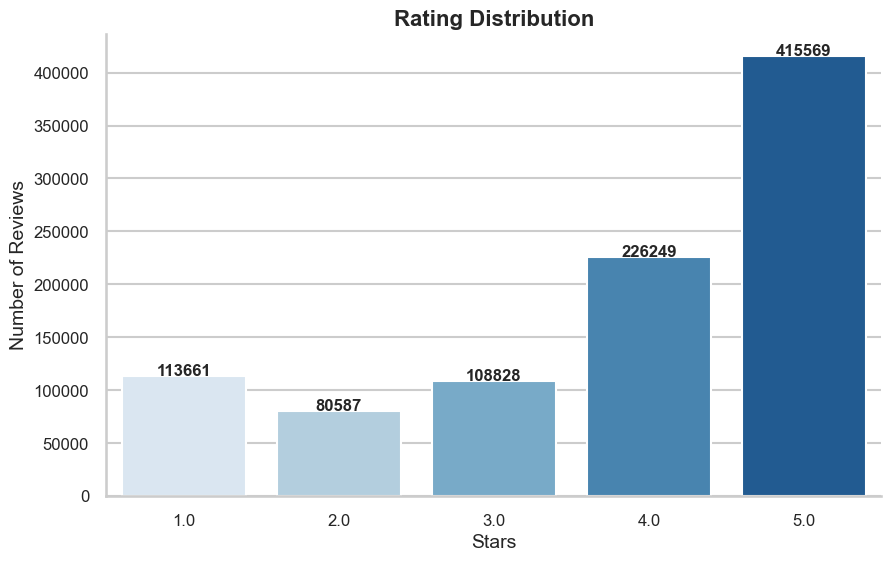

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

rating_distribution = df1['stars'].value_counts().sort_index()

# Styling
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

palette = sns.color_palette("Blues", len(rating_distribution))

# Create a barplot with the specified palette
bar = sns.barplot(x=rating_distribution.index, y=rating_distribution.values, palette=palette)

# Adding annotations to each bar
for p in bar.patches:
    height = p.get_height()
    bar.text(p.get_x() + p.get_width()/2., height + 5, int(height), ha="center", fontsize=12, fontweight='bold')

plt.title('Rating Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Stars', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Removing the top and right spines for aesthetics
sns.despine(top=True, right=True)

plt.show()


The bar chart shows a clear trend of increasing review counts with higher star ratings, peaking at 5 stars, suggesting that users are more likely to post reviews after positive experiences. There's a significant drop in the number of reviews for middle-of-the-road (3-star) ratings, indicating a potential lack of motivation to leave feedback for average experiences. The low number of 1-star and 2-star reviews could imply either higher overall satisfaction or a hesitancy to leave negative feedback. The dominance of 4-star and 5-star ratings indicates that the services or products reviewed are generally well-received.

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944894 entries, 0 to 944893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    944894 non-null  object        
 1   user_id      944894 non-null  object        
 2   business_id  944894 non-null  object        
 3   stars        944894 non-null  float64       
 4   useful       944894 non-null  int64         
 5   funny        944894 non-null  int64         
 6   cool         944894 non-null  int64         
 7   text         944894 non-null  object        
 8   date         944894 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 64.9+ MB


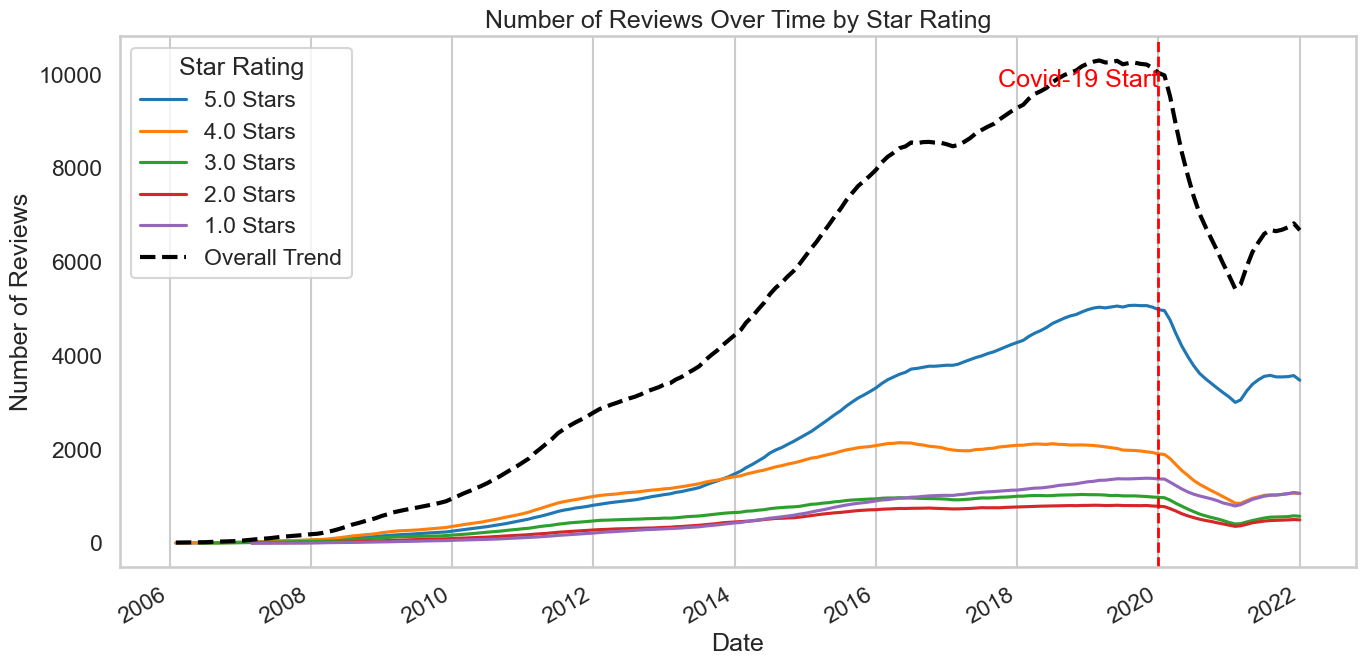

In [67]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Ensure the 'date' column is in datetime format
df1['date'] = pd.to_datetime(df1['date'])

# Group data by month and star rating
reviews_per_month_and_rating = df1.groupby([df1['date'].dt.to_period('M'), 'stars']).size().unstack()

# Calculate the rolling average
rolling_reviews = reviews_per_month_and_rating.rolling(window=12).mean()

# Plot the rolling average data
plt.figure(figsize=(14, 7))
for star in sorted(reviews_per_month_and_rating.columns, reverse=True):
    plt.plot(rolling_reviews.index.to_timestamp(), rolling_reviews[star], label=f'{star} Stars')

# Plot the overall trend line
total_reviews_per_month = df1.groupby(df1['date'].dt.to_period('M')).size()
trend = total_reviews_per_month.rolling(window=12).mean()
trend.plot(color='black', linewidth=3, linestyle='--', label='Overall Trend')

# Check the range instead of using unique()
covid_start_date = pd.to_datetime('2020-01-01')
if covid_start_date >= df1['date'].min() and covid_start_date <= df1['date'].max():
    plt.axvline(x=covid_start_date, color='red', linestyle='--', lw=2)
    plt.text(covid_start_date, plt.ylim()[1]*0.9, 'Covid-19 Start', color='red', horizontalalignment='right')

plt.title('Number of Reviews Over Time by Star Rating')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend(title='Star Rating')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


Review Word Count Summary Statistics by Star Rating:
             mean  median         std   count
stars                                        
1.0    117.681896    85.0  108.080386  113661
2.0    129.063881    97.0  110.760252   80587
3.0    122.469392    93.0  102.835002  108828
4.0    106.320333    79.0   92.805515  226249
5.0     81.149272    57.0   77.549442  415569


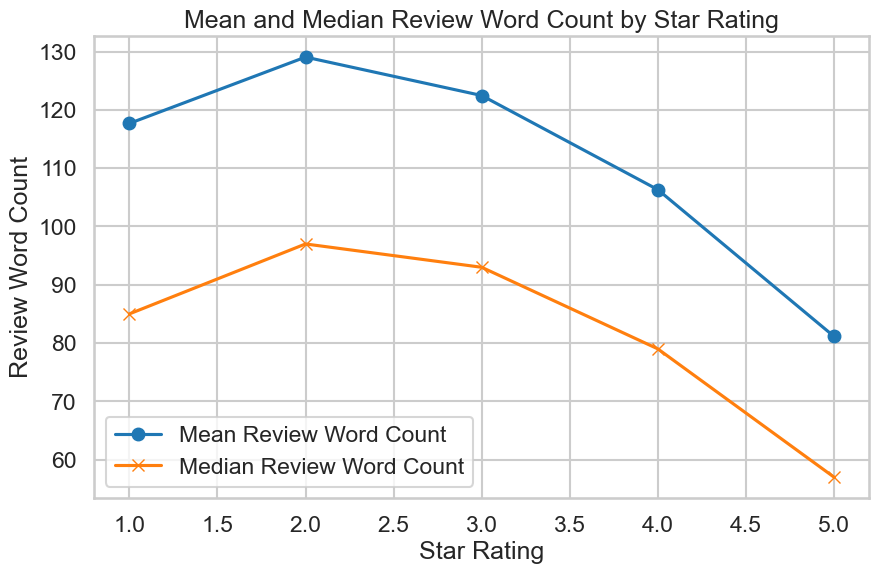

,mean,median,std,count
stars,,,,
1.000000,117.68,85.00,108.08,113661.00
2.000000,129.06,97.00,110.76,80587.00
3.000000,122.47,93.00,102.84,108828.00
4.000000,106.32,79.00,92.81,226249.00
5.000000,81.15,57.00,77.55,415569.00


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data
df1 = pd.read_csv("filtered_reviews_part_1.csv")  

# Calculate the length of reviews in terms of word count
df1['review_word_count'] = df1['text'].str.split().apply(len)

# Calculate summary statistics for review word counts by star rating
review_word_count_stats = df1.groupby('stars')['review_word_count'].agg(['mean', 'median', 'std', 'count'])
print("Review Word Count Summary Statistics by Star Rating:")
print(review_word_count_stats)

# Plot mean and median review word count by star rating
plt.figure(figsize=(10, 6))
review_word_count_stats['mean'].plot(label='Mean Review Word Count', marker='o')
review_word_count_stats['median'].plot(label='Median Review Word Count', marker='x')
plt.title('Mean and Median Review Word Count by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Review Word Count')
plt.legend()
plt.grid(True)
plt.show()

# Display the styled dataframe as a table
styled_review_word_count_stats = review_word_count_stats.style.background_gradient(cmap='coolwarm').format("{:.2f}")
styled_review_word_count_stats


# Using sentiment Analysis file for these reviews

In [75]:
df2= pd.read_csv('df1_cleaned_sentiment.csv')
df2.info()

/var/folders/5j/qcfnms155kq9pk31c0zqlhp80000gn/T/ipykernel_77929/666840996.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2= pd.read_csv('df1_cleaned_sentiment.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944901 entries, 0 to 944900
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review_id           944901 non-null  object 
 1   user_id             944898 non-null  object 
 2   business_id         944898 non-null  object 
 3   stars               944898 non-null  object 
 4   useful              944898 non-null  float64
 5   funny               944898 non-null  float64
 6   cool                944898 non-null  float64
 7   text                944892 non-null  object 
 8   date                944894 non-null  object 
 9   text_no_stop        944883 non-null  object 
 10  text_stemmed        944883 non-null  object 
 11  review_length       944890 non-null  float64
 12  word_count          944890 non-null  float64
 13  aspect              944890 non-null  float64
 14  aspect_label        944890 non-null  object 
 15  sentiment_polarity  944890 non-nul

In [76]:
df2['stars'] = pd.to_numeric(df2['stars'], errors='coerce')
df2.dropna(subset=['stars'], inplace=True)


Engagement scores in Yelp review analysis serve as a key metric for identifying the most impactful reviews, offering insights into what resonates with customers. These scores, when combined with sentiment analysis, provide deeper understanding into customer preferences, guiding businesses in pinpointing areas for improvement and capitalizing on strengths. Essentially, they offer a nuanced view of customer engagement trends, aiding in data-driven decision-making to enhance overall customer satisfaction and loyalty


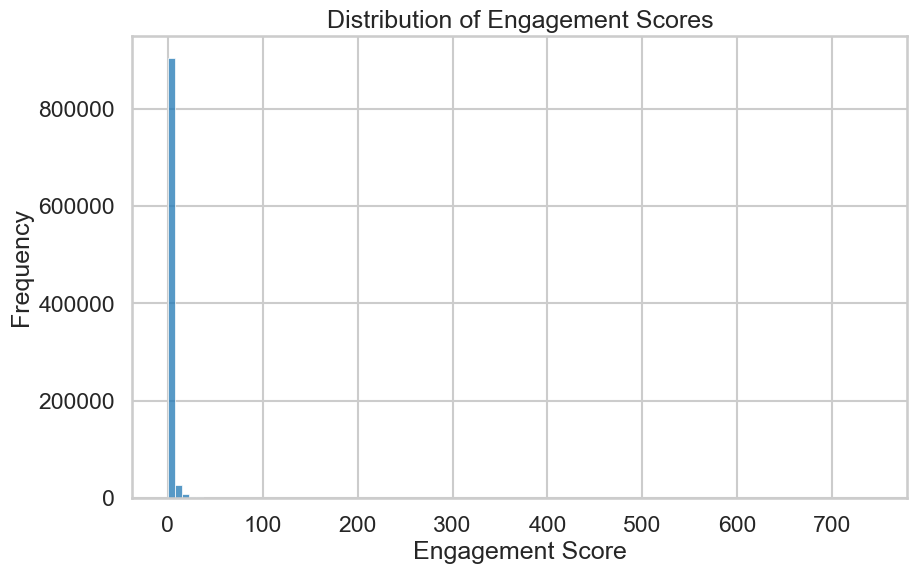

<Figure size 1000x600 with 0 Axes>

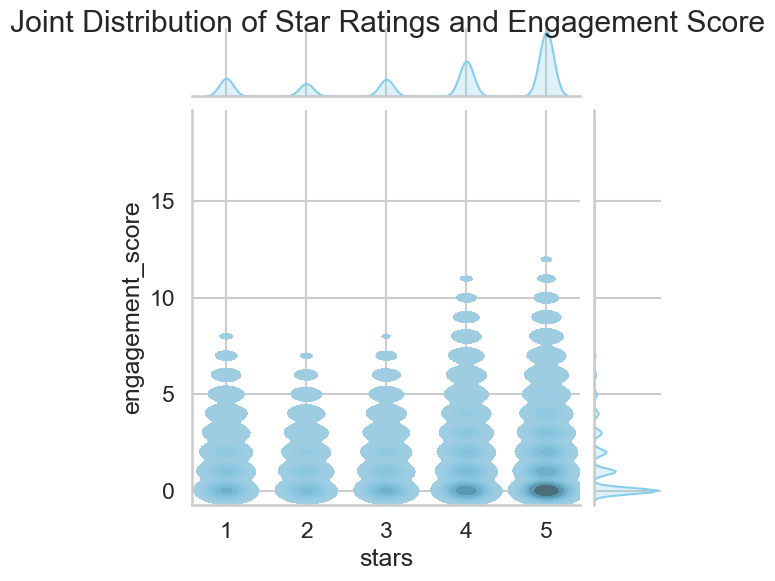

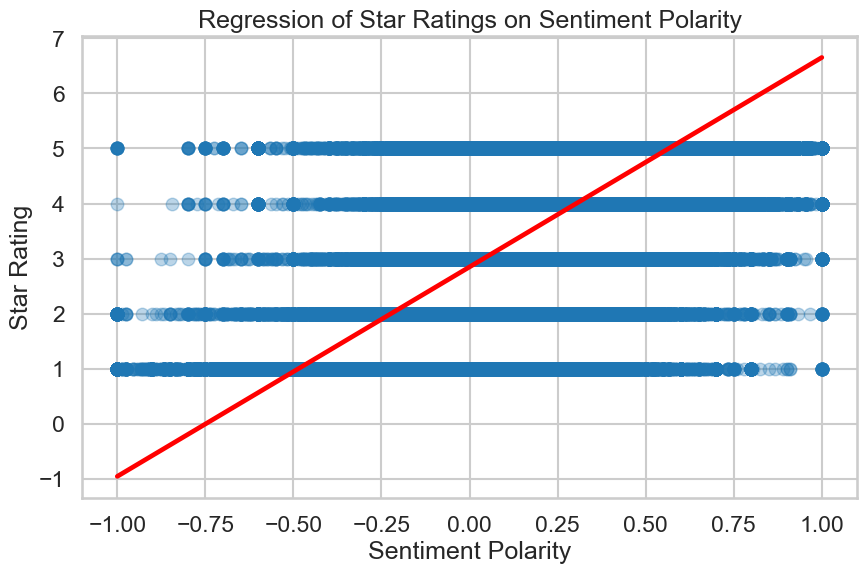

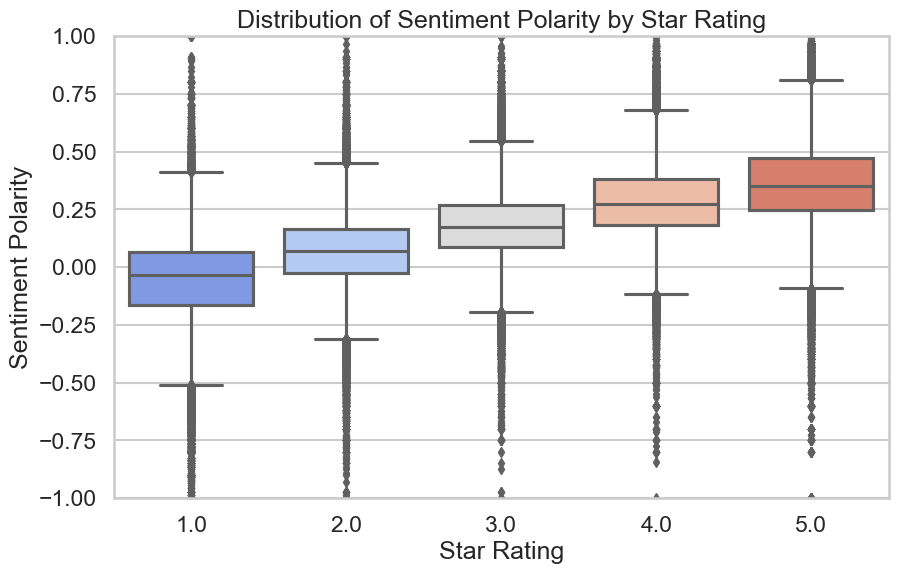

In [78]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert 'stars' to numeric
df2['stars'] = pd.to_numeric(df2['stars'], errors='coerce')
df2.dropna(subset=['stars', 'useful', 'funny', 'cool', 'sentiment_polarity'], inplace=True)

# Create a combined engagement score
df2['engagement_score'] = df2['useful'] + df2['funny'] + df2['cool']

plt.figure(figsize=(10, 6))
sns.histplot(df2['engagement_score'], bins=100)
plt.title('Distribution of Engagement Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')
plt.show()

max_engagement_score = df2['engagement_score'].quantile(0.99)  # 99th percentile

# Plot a joint distribution plot between star ratings and the engagement score with adjusted gridsize
plt.figure(figsize=(10, 6))
sns.jointplot(
    data=df2[df2['engagement_score'] <= max_engagement_score],
    x='stars',
    y='engagement_score',
    kind='kde',  # Changed from 'hex' to 'kde' for a smoother distribution plot
    color='skyblue',
    fill=True,  # Fill the KDE plot for better visibility
)
plt.suptitle('Joint Distribution of Star Ratings and Engagement Score')
plt.subplots_adjust(top=0.95)
plt.show()

# Regression plot to quantify the relationship with adjusted alpha for better visualization
plt.figure(figsize=(10, 6))
sns.regplot(data=df2, x='sentiment_polarity', y='stars', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Regression of Star Ratings on Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Star Rating')
plt.show()

# Boxplot to visualize the relationship between sentiment polarity and star ratings with adjusted y-axis scale
plt.figure(figsize=(10, 6))
sns.boxplot(x='stars', y='sentiment_polarity', data=df2[df2['sentiment_polarity'].between(-1, 1)], palette='coolwarm')
plt.title('Distribution of Sentiment Polarity by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Sentiment Polarity')
plt.ylim(-1, 1)  # Adjust y-axis scale to focus on the majority of the data
plt.show()




In [79]:
# Calculate summary statistics for insights
summary_stats = df2.groupby('stars').agg({
    'engagement_score': ['mean', 'median', 'std', 'count'],
    'sentiment_polarity': ['mean', 'median', 'std']
}).reset_index()

# Display the summary statistics as a table
summary_stats

stars engagement_score                          sentiment_polarity   
                    mean median       std   count               mean   
0   1.0         1.668356    1.0  4.233940  113661          -0.060119  \
1   2.0         1.770484    1.0  4.760482   80587           0.065483   
2   3.0         1.839441    0.0  6.049932  108826           0.180464   
3   4.0         2.120235    0.0  7.135823  226249           0.287706   
4   5.0         1.585857    0.0  6.008974  415567           0.364062   

                       
     median       std  
0 -0.035706  0.210969  
1  0.070370  0.172236  
2  0.175000  0.160684  
3  0.273283  0.165440  
4  0.350909  0.181095

Our analysis indicates that reviews receiving moderate star ratings attract higher user engagement. This suggests a preference among users for reviews that offer a comprehensive evaluation, blending both positive and negative aspects. Such a trend underscores the value users place on balanced and insightful feedback, reflecting a desire for authenticity and depth in user-generated content.

The table shows the mean, median, standard deviation (std), and count for engagement scores and sentiment polarity across different star ratings. Here's how we interpret this data:

Engagement Score: The median engagement scores for 1-star and 2-star reviews are higher compared to 3, 4, and 5 stars, despite the mean scores being higher for 4-star reviews. This indicates that while extremely positive or negative reviews might not always receive high engagement, they tend to consistently receive some engagement (as reflected by the median). This suggests a level of user interest in these more polarized reviews.

Sentiment Polarity: The mean and median sentiment polarity values increase progressively from 1-star to 5-star reviews. This shows that the language used in reviews becomes more positive as the star rating increases. Notably, the sentiment polarity for 1-star reviews is slightly negative on average, reinforcing that lower-rated reviews are associated with negative sentiments.

Review Count: There is a significant increase in the number of reviews as the star rating increases, with 5-star reviews being the most numerous. This suggests that users are more likely to leave reviews for positive experiences.

Overall, these insights suggest that while users engage somewhat consistently across different ratings, they tend to leave more reviews for positive experiences. Additionally, the sentiment expressed in these reviews aligns closely with the star ratings, indicating that higher ratings are associated with more positive language.

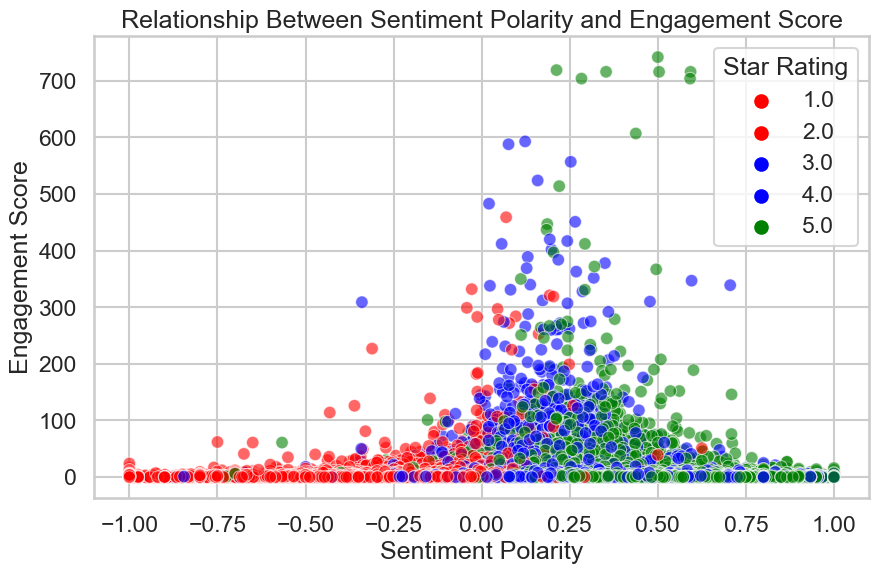

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt



# Custom palette to display moderate star ratings in red and 4-5 stars in green
custom_palette = {1: "red", 2: "red", 3: "blue", 4: "blue", 5: "green"}

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='sentiment_polarity', y='engagement_score', hue='stars', palette=custom_palette, alpha=0.6)
plt.title('Relationship Between Sentiment Polarity and Engagement Score')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Engagement Score')
plt.legend(title='Star Rating')
plt.show()


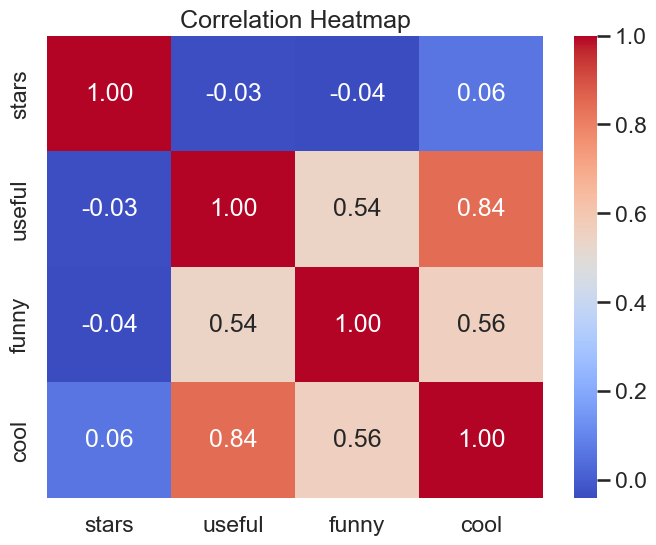

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select the columns for correlation analysis
numerical_cols = ['stars', 'useful', 'funny', 'cool']
correlation_matrix = df2[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Preprocessing using NLTK

In [10]:


five_star_reviews = df1[df1['stars'] == 5]['text']


stop_words = set(stopwords.words('english'))


def process_review(review):
   
    words = word_tokenize(review)
    words = [word for word in words if len(word) > 1]
    words = [word for word in words if not word.isnumeric()]
    words = [word.lower() for word in words]
    words = [word for word in words if word not in stop_words]
    return words


all_words = []
for review in five_star_reviews:
    all_words.extend(process_review(review))


nouns = [word for word, pos in pos_tag(all_words) if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
word_freq = Counter(nouns)

# Display the 10 most common nouns (aspects)
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")


food: 264717
place: 192528
service: 129678
time: 98569
staff: 67379
restaurant: 58665
everything: 54316
order: 52408
menu: 46016
chicken: 41023


In [14]:
# Display the 50 most common nouns (aspects)
for word, freq in word_freq.most_common(50):
    print(f"{word}: {freq}")


food: 264717
place: 192528
service: 129678
time: 98569
staff: 67379
restaurant: 58665
everything: 54316
order: 52408
menu: 46016
chicken: 41023
experience: 40362
bar: 37471
pizza: 37428
night: 36054
dinner: 34965
area: 34282
people: 33358
try: 31156
day: 30663
love: 30630
sauce: 29965
lunch: 29683
meal: 29664
spot: 29254
way: 28283
drinks: 26900
breakfast: 25799
family: 25703
times: 25209
fries: 25156
coffee: 24596
beer: 23764
eat: 23040
pork: 22103
home: 22028
town: 21720
salad: 21481
flavor: 21274
something: 20998
prices: 20861
everyone: 20566
places: 20429
location: 20415
quality: 20409
visit: 19920
options: 19648
burger: 19476
dishes: 19227
meat: 19150
side: 18714


In [15]:
df1.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,T1iMdZeNzNRGB2SW_GYb-Q,Xy_6tT8l0Y5JNrSbL3_4uw,6PCHwjpYRMo1ZvY8m91bIg,3.0,1,0,0,If I were rating this place a few months ago i...,2015-12-29 22:09:28
1,y4GTzdMEgbMCnLSB3tvnMA,xUinwQIaC7G4B1OhrKJeOw,ALK-7tTvDKAzxAtIiNyh2A,5.0,0,0,0,Incredible food! Really unique combination of ...,2019-11-04 14:47:55
2,3yAQ2Chq47Dpap4nj-kUOg,pTdEM0c4El5cFwVAceLtNg,nqePY399khxYpBBpNjA_zw,5.0,0,0,0,A great local place to get great sandwiches. ...,2018-10-15 19:16:29
3,bs-cfyfjzQRTlT2RFsAHWw,jy9fiTWK-7liefYYkN4KnQ,h_d4fcmFsRFQYmvYaS2bzw,5.0,0,0,0,This is the real deal! I sat at the sushi bar...,2017-11-03 03:11:19
4,eZw0IfB9hYOjvigFX16Eeg,9sukFJd_IVRuDEv7MDHl6A,Cjb6F4tUM3B5Z7eV2lhfMg,5.0,0,0,0,Great neighborhood sushi place. Ask for the fa...,2015-05-18 00:34:33


In [16]:
df1.shape

(944894, 9)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944894 entries, 0 to 944893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    944894 non-null  object        
 1   user_id      944894 non-null  object        
 2   business_id  944894 non-null  object        
 3   stars        944894 non-null  float64       
 4   useful       944894 non-null  int64         
 5   funny        944894 non-null  int64         
 6   cool         944894 non-null  int64         
 7   text         944894 non-null  object        
 8   date         944894 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 64.9+ MB


In [19]:
missing_values = df1.isnull().sum()
missing_values

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [20]:
duplicates = df1.duplicated().sum()
duplicates

0

In [21]:
df1.describe()

,stars,useful,funny,cool,date
count,944894.000000,944894.000000,944894.000000,944894.000000,944894
mean,3.793187,0.986371,0.301852,0.480462,2016-12-21 14:00:51.965792768
min,1.000000,0.000000,0.000000,0.000000,2005-03-01 16:57:17
25%,3.000000,0.000000,0.000000,0.000000,2015-01-02 08:19:17
50%,4.000000,0.000000,0.000000,0.000000,2017-05-13 05:39:03.500000
75%,5.000000,1.000000,0.000000,0.000000,2019-05-05 23:04:42.249999872
max,5.000000,420.000000,357.000000,371.000000,2022-01-19 19:45:56
std,1.391389,2.843192,1.720571,2.239431,NaN


In [24]:
df1['text'] = df1['text'].str.replace(r'<[^>]+>', '', regex=True)
df1['text'] = df1['text'].str.replace(r'[^\w\s]', '', regex=True)
df1['text'] = df1['text'].str.strip()


In [26]:
# Normalize text to lowercase
df1['text'] = df1['text'].str.lower()

# Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df1['text_no_stop'] = df1['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to /Users/ankur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
# Apply stemming or lemmatization
nltk.download('wordnet')
stemmer = PorterStemmer()
df1['text_stemmed'] = df1['text_no_stop'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Create new features such as review length or word count
df1['review_length'] = df1['text'].apply(len)
df1['word_count'] = df1['text'].apply(lambda x: len(x.split()))

[nltk_data] Downloading package wordnet to /Users/ankur/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:


# Analyze distribution of reviews across different businesses and users
business_reviews = df1['business_id'].value_counts()
business_reviews

business_id
_ab50qdWOk0DdB6XOrBitw    1489
ac1AeYqs8Z4_e2X5M3if2A    1419
GXFMD0Z4jEVZBCsbPf4CTQ    1207
ytynqOUb3hjKeJfRj5Tshw    1138
iSRTaT9WngzB8JJ2YKJUig    1120
                          ... 
Ibf7OyrUN-Nl49MiO0821A       1
AQFdx66VvAWx6B4Fm3Y7NA       1
WHZCdHWAn50Xd5W8rxtklA       1
MwcWqRwl-N-IvwUBlpLbaQ       1
WBUEQ0evgAFAkyooHihhSg       1
Name: count, Length: 49884, dtype: int64

In [37]:
user_reviews = df1['user_id'].value_counts()
user_reviews


user_id
_BcWyKQL16ndpBdggh2kNA    314
-G7Zkl1wIWBBmD0KRy_sCw    256
ET8n-r7glWYqZhuR6GcdNw    246
fr1Hz2acAb3OaL3l6DyKNg    231
1HM81n6n4iPIFU5d2Lokhw    209
                         ... 
-fTiYQGuDX1B_6XWMdfUyA      1
L6vkAcISVI1n8B5eeHkQmA      1
sMO4-Axe4HT-UBjwIZosEw      1
aUlSOrwcNT-40Gbsljm15w      1
CDH9gep3VDIF5GjOt6bw1g      1
Name: count, Length: 507585, dtype: int64

In [31]:
# Investigate correlation between 'stars' rating and 'useful', 'funny', and 'cool' counts
correlations = df1[['stars', 'useful', 'funny', 'cool']].corr()
correlations


,stars,useful,funny,cool
stars,1.000000,-0.034815,-0.040748,0.058607
useful,-0.034815,1.000000,0.540908,0.843439
funny,-0.040748,0.540908,1.000000,0.562077
cool,0.058607,0.843439,0.562077,1.000000


In [32]:
# Explore distribution of review lengths
review_length_distribution = df1['review_length'].describe()
review_length_distribution

count    944894.000000
mean        528.807039
std         489.726200
min           0.000000
25%         211.000000
50%         376.000000
75%         674.000000
max        4949.000000
Name: review_length, dtype: float64

In [39]:
df1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_no_stop,text_stemmed,review_length,word_count
0,T1iMdZeNzNRGB2SW_GYb-Q,Xy_6tT8l0Y5JNrSbL3_4uw,6PCHwjpYRMo1ZvY8m91bIg,3.0,1,0,0,if i were rating this place a few months ago i...,2015-12-29 22:09:28,rating place months ago would 4 5 stars truly ...,rate place month ago would 4 5 star truli stru...,1382,276
1,y4GTzdMEgbMCnLSB3tvnMA,xUinwQIaC7G4B1OhrKJeOw,ALK-7tTvDKAzxAtIiNyh2A,5.0,0,0,0,incredible food really unique combination of f...,2019-11-04 14:47:55,incredible food really unique combination flav...,incred food realli uniqu combin flavor discern...,1256,208
2,3yAQ2Chq47Dpap4nj-kUOg,pTdEM0c4El5cFwVAceLtNg,nqePY399khxYpBBpNjA_zw,5.0,0,0,0,a great local place to get great sandwiches ...,2018-10-15 19:16:29,great local place get great sandwiches may act...,great local place get great sandwich may actua...,157,30
3,bs-cfyfjzQRTlT2RFsAHWw,jy9fiTWK-7liefYYkN4KnQ,h_d4fcmFsRFQYmvYaS2bzw,5.0,0,0,0,this is the real deal i sat at the sushi bar ...,2017-11-03 03:11:19,real deal sat sushi bar ordered days nigiri sp...,real deal sat sushi bar order day nigiri speci...,134,26
4,eZw0IfB9hYOjvigFX16Eeg,9sukFJd_IVRuDEv7MDHl6A,Cjb6F4tUM3B5Z7eV2lhfMg,5.0,0,0,0,great neighborhood sushi place ask for the fat...,2015-05-18 00:34:33,great neighborhood sushi place ask fat boy rol...,great neighborhood sushi place ask fat boy rol...,108,21


In [40]:
df1.shape

(944894, 13)

In [35]:
# df1.to_csv('df1_cleaned.csv', index=False)


The evaluation metrics include accuracy (the proportion of correctly predicted ratings), precision (the proportion of positive identifications that were actually correct), recall (the proportion of actual positives that were identified correctly), and the F1 score (the harmonic mean of precision and recall).

In [34]:


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1['text_stemmed'],
                                    df1['stars'], test_size=0.25, random_state=42)

# Train a Naive Bayes classifier
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

# Evaluate the model
y_pred = nb_model.predict(X_test_vectorized)
evaluation_metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro'),
    'f1_score': f1_score(y_test, y_pred, average='macro')
}

# Print evaluation metrics
for metric, value in evaluation_metrics.items():
    print(f'{metric}: {value:.4f}')



accuracy: 0.6283
precision: 0.5384
recall: 0.5268
f1_score: 0.5280


# LDA for Topic modelling

In [ ]:
# Each topic will have a distribution over words in the vocabulary, and you can infer
# the aspect from these distributions.



In [41]:
# Latent Dirichlet Allocation


# Import the necessary libraries
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Prepare the text data for LDA analysis
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
text_data = vectorizer.fit_transform(df1['text_stemmed'])

# Choose the number of topics you want to find
num_topics = 5  

# Create and fit the LDA model
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(text_data)

#
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                for i in topic.argsort()[:-top_n - 1:-1]])

print_topics(lda, vectorizer)



Topic 0:
[('chicken', 131357.90712982236), ('fri', 128957.06466929908), ('good', 127331.96250339723), ('order', 106442.42322781678), ('sandwich', 91933.87438777617), ('tri', 80876.56692554732), ('like', 79997.44995193013), ('burger', 78738.0190199962), ('place', 75129.39333942541), ('chees', 67448.16349370846)]
Topic 1:
[('order', 218533.90932619688), ('food', 187675.51841649093), ('time', 140324.5581332013), ('wait', 123092.93988764391), ('ask', 104933.44871355424), ('tabl', 103077.75480354953), ('servic', 99188.34661329248), ('minut', 96460.00336452195), ('place', 86012.62203479964), ('like', 78648.01361770823)]
Topic 2:
[('great', 266514.79326821706), ('food', 253659.13636649228), ('place', 210445.75744591653), ('good', 143474.79579691374), ('servic', 119017.53548746122), ('love', 105404.33801971907), ('bar', 84531.10426011083), ('friendli', 81726.75775683306), ('beer', 81633.80048525732), ('drink', 79580.3727736073)]
Topic 3:
[('food', 149392.6755926372), ('place', 144329.794925808

In [45]:
df1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_no_stop,text_stemmed,review_length,word_count
0,T1iMdZeNzNRGB2SW_GYb-Q,Xy_6tT8l0Y5JNrSbL3_4uw,6PCHwjpYRMo1ZvY8m91bIg,3.0,1,0,0,if i were rating this place a few months ago i...,2015-12-29 22:09:28,rating place months ago would 4 5 stars truly ...,rate place month ago would 4 5 star truli stru...,1382,276
1,y4GTzdMEgbMCnLSB3tvnMA,xUinwQIaC7G4B1OhrKJeOw,ALK-7tTvDKAzxAtIiNyh2A,5.0,0,0,0,incredible food really unique combination of f...,2019-11-04 14:47:55,incredible food really unique combination flav...,incred food realli uniqu combin flavor discern...,1256,208
2,3yAQ2Chq47Dpap4nj-kUOg,pTdEM0c4El5cFwVAceLtNg,nqePY399khxYpBBpNjA_zw,5.0,0,0,0,a great local place to get great sandwiches ...,2018-10-15 19:16:29,great local place get great sandwiches may act...,great local place get great sandwich may actua...,157,30
3,bs-cfyfjzQRTlT2RFsAHWw,jy9fiTWK-7liefYYkN4KnQ,h_d4fcmFsRFQYmvYaS2bzw,5.0,0,0,0,this is the real deal i sat at the sushi bar ...,2017-11-03 03:11:19,real deal sat sushi bar ordered days nigiri sp...,real deal sat sushi bar order day nigiri speci...,134,26
4,eZw0IfB9hYOjvigFX16Eeg,9sukFJd_IVRuDEv7MDHl6A,Cjb6F4tUM3B5Z7eV2lhfMg,5.0,0,0,0,great neighborhood sushi place ask for the fat...,2015-05-18 00:34:33,great neighborhood sushi place ask fat boy rol...,great neighborhood sushi place ask fat boy rol...,108,21


In [ ]:
topic_results = lda.transform(text_data)


In [47]:
topic_results = lda.transform(text_data)



# Intial aspect exploration

In [48]:
# Aspect Labeling based on LDA topics
aspect_labels = {
    0: 'Food Quality',
    1: 'Service and Wait Time',
    2: 'Overall Experience',
    3: 'Menu and Pricing',
    4: 'Specific Dishes and Restaurant'
}

df1['aspect'] = topic_results.argmax(axis=1)
df1['aspect_label'] = df1['aspect'].map(aspect_labels)

# Sentiment Association using TextBlob (as an example)
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df1['sentiment_polarity'] = df1['text'].apply(get_sentiment)

# Now, df1 has two new columns: 'aspect_label' and 'sentiment_polarity'.


In [49]:
df1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_no_stop,text_stemmed,review_length,word_count,aspect,aspect_label,sentiment_polarity
0,T1iMdZeNzNRGB2SW_GYb-Q,Xy_6tT8l0Y5JNrSbL3_4uw,6PCHwjpYRMo1ZvY8m91bIg,3.0,1,0,0,if i were rating this place a few months ago i...,2015-12-29 22:09:28,rating place months ago would 4 5 stars truly ...,rate place month ago would 4 5 star truli stru...,1382,276,4,Specific Dishes and Restaurant,0.223633
1,y4GTzdMEgbMCnLSB3tvnMA,xUinwQIaC7G4B1OhrKJeOw,ALK-7tTvDKAzxAtIiNyh2A,5.0,0,0,0,incredible food really unique combination of f...,2019-11-04 14:47:55,incredible food really unique combination flav...,incred food realli uniqu combin flavor discern...,1256,208,4,Specific Dishes and Restaurant,0.434493
2,3yAQ2Chq47Dpap4nj-kUOg,pTdEM0c4El5cFwVAceLtNg,nqePY399khxYpBBpNjA_zw,5.0,0,0,0,a great local place to get great sandwiches ...,2018-10-15 19:16:29,great local place get great sandwiches may act...,great local place get great sandwich may actua...,157,30,2,Overall Experience,0.441667
3,bs-cfyfjzQRTlT2RFsAHWw,jy9fiTWK-7liefYYkN4KnQ,h_d4fcmFsRFQYmvYaS2bzw,5.0,0,0,0,this is the real deal i sat at the sushi bar ...,2017-11-03 03:11:19,real deal sat sushi bar ordered days nigiri sp...,real deal sat sushi bar order day nigiri speci...,134,26,3,Menu and Pricing,0.225000
4,eZw0IfB9hYOjvigFX16Eeg,9sukFJd_IVRuDEv7MDHl6A,Cjb6F4tUM3B5Z7eV2lhfMg,5.0,0,0,0,great neighborhood sushi place ask for the fat...,2015-05-18 00:34:33,great neighborhood sushi place ask fat boy rol...,great neighborhood sushi place ask fat boy rol...,108,21,3,Menu and Pricing,0.616667


In [50]:
# df1.to_csv('df1_cleaned_sentiment.csv', index=False)


# Visualization of aspects

count    944894.000000
mean          0.248144
std           0.230050
min          -1.000000
25%           0.116179
50%           0.254417
75%           0.390152
max           1.000000
Name: sentiment_polarity, dtype: float64


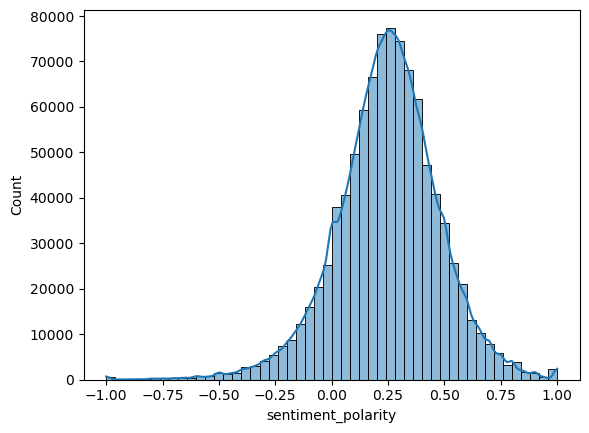

In [51]:
import seaborn as sns

# Plotting the distribution of sentiment polarity scores
sns.histplot(df1['sentiment_polarity'], bins=50, kde=True)

# Descriptive statistics
print(df1['sentiment_polarity'].describe())

# Based on the output of the plot and statistics, you can make an informed decision on the thresholds


In [64]:
def categorize_sentiment(polarity):
    if polarity > 0.24:
        return 'positive'
    elif polarity < 0.116:
        return 'negative'
    else:
        return 'neutral'

df1['sentiment_category'] = df1['sentiment_polarity'].apply(categorize_sentiment)


In [65]:
df1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_no_stop,text_stemmed,review_length,word_count,aspect,aspect_label,sentiment_polarity,sentiment_category
0,T1iMdZeNzNRGB2SW_GYb-Q,Xy_6tT8l0Y5JNrSbL3_4uw,6PCHwjpYRMo1ZvY8m91bIg,3.0,1,0,0,if i were rating this place a few months ago i...,2015-12-29 22:09:28,rating place months ago would 4 5 stars truly ...,rate place month ago would 4 5 star truli stru...,1382,276,4,Specific Dishes and Restaurant,0.223633,neutral
1,y4GTzdMEgbMCnLSB3tvnMA,xUinwQIaC7G4B1OhrKJeOw,ALK-7tTvDKAzxAtIiNyh2A,5.0,0,0,0,incredible food really unique combination of f...,2019-11-04 14:47:55,incredible food really unique combination flav...,incred food realli uniqu combin flavor discern...,1256,208,4,Specific Dishes and Restaurant,0.434493,positive
2,3yAQ2Chq47Dpap4nj-kUOg,pTdEM0c4El5cFwVAceLtNg,nqePY399khxYpBBpNjA_zw,5.0,0,0,0,a great local place to get great sandwiches ...,2018-10-15 19:16:29,great local place get great sandwiches may act...,great local place get great sandwich may actua...,157,30,2,Overall Experience,0.441667,positive
3,bs-cfyfjzQRTlT2RFsAHWw,jy9fiTWK-7liefYYkN4KnQ,h_d4fcmFsRFQYmvYaS2bzw,5.0,0,0,0,this is the real deal i sat at the sushi bar ...,2017-11-03 03:11:19,real deal sat sushi bar ordered days nigiri sp...,real deal sat sushi bar order day nigiri speci...,134,26,3,Menu and Pricing,0.225000,neutral
4,eZw0IfB9hYOjvigFX16Eeg,9sukFJd_IVRuDEv7MDHl6A,Cjb6F4tUM3B5Z7eV2lhfMg,5.0,0,0,0,great neighborhood sushi place ask for the fat...,2015-05-18 00:34:33,great neighborhood sushi place ask fat boy rol...,great neighborhood sushi place ask fat boy rol...,108,21,3,Menu and Pricing,0.616667,positive


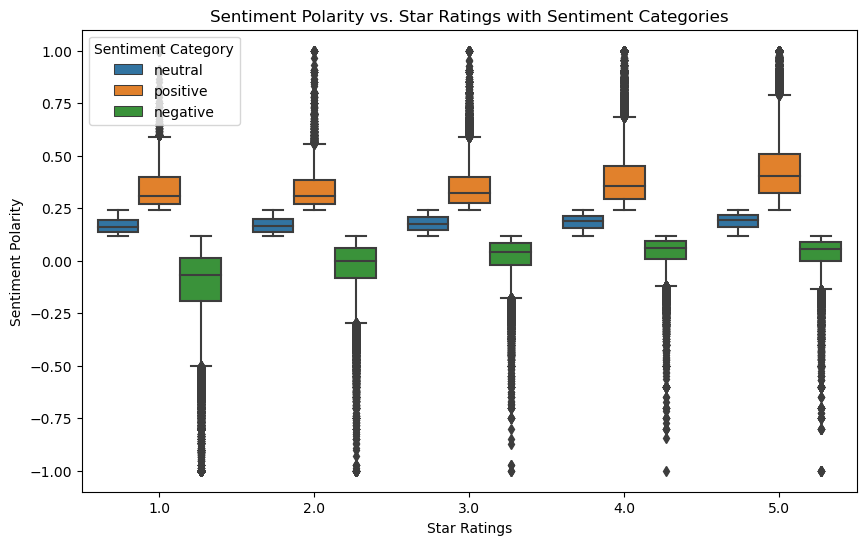

In [66]:
# Plot sentiment polarity against star ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='stars', y='sentiment_polarity', data=df1, hue='sentiment_category')
plt.title('Sentiment Polarity vs. Star Ratings with Sentiment Categories')
plt.xlabel('Star Ratings')
plt.ylabel('Sentiment Polarity')
plt.legend(title='Sentiment Category', loc='upper left')
plt.show()


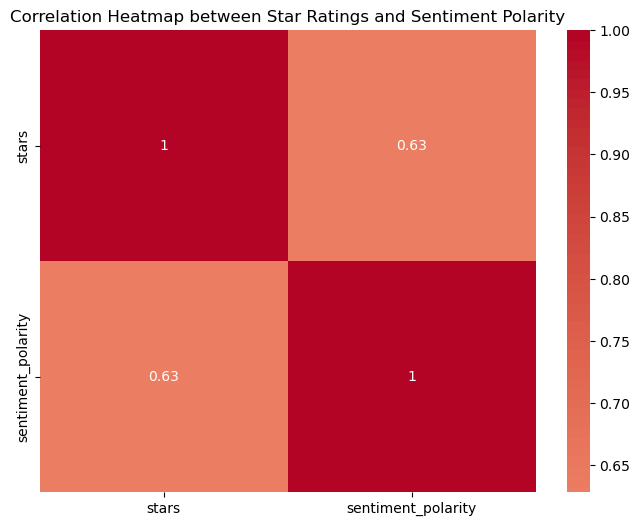

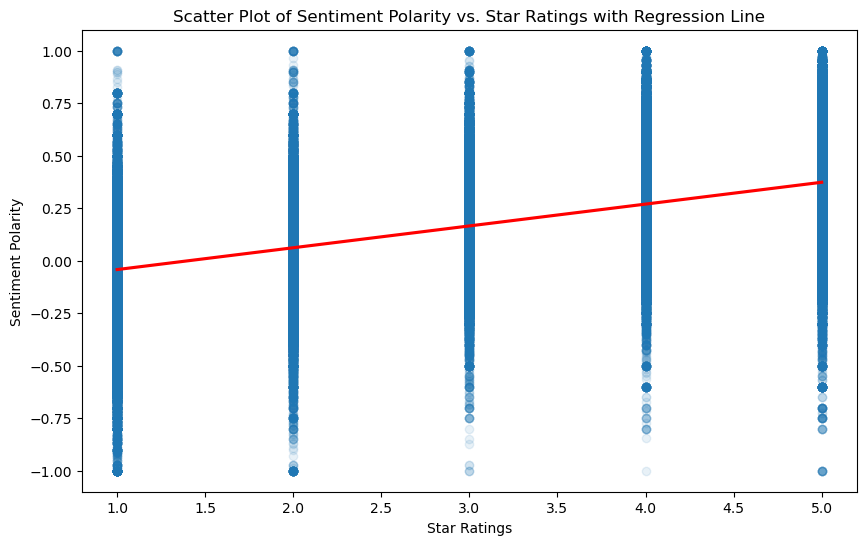

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df1[['stars', 'sentiment_polarity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap between Star Ratings and Sentiment Polarity')
plt.show()

# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x='stars', y='sentiment_polarity', data=df1, scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
plt.title('Scatter Plot of Sentiment Polarity vs. Star Ratings with Regression Line')
plt.xlabel('Star Ratings')
plt.ylabel('Sentiment Polarity')
plt.show()


In [68]:
# Group by 'stars' and 'sentiment_category' and get the count
sentiment_counts_by_star = df1.groupby(['stars', 'sentiment_category']).size().reset_index(name='count')

# Pivot the results to get a better table format where each sentiment category becomes a column
pivot_table = sentiment_counts_by_star.pivot(index='stars', columns='sentiment_category', values='count').fillna(0)

print(pivot_table)

sentiment_category  negative  neutral  positive
stars                                          
1.0                    95518    12787      5356
2.0                    50766    20075      9746
3.0                    35550    38585     34693
4.0                    27476    64643    134130
5.0                    26724    72039    316806


<Figure size 1000x600 with 0 Axes>

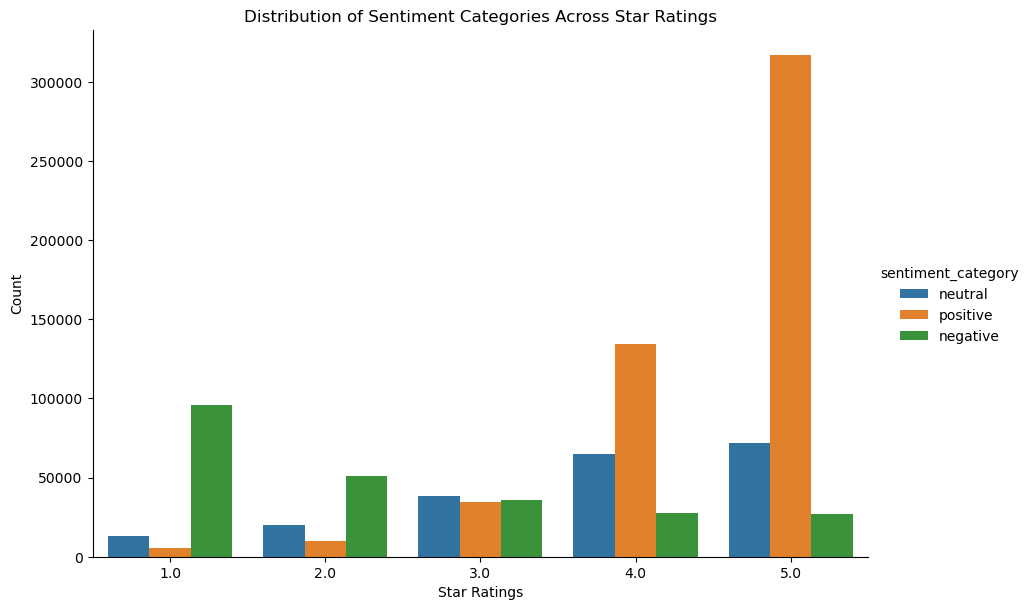

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt



# Group by 'stars' and 'sentiment_category' and get the count
sentiment_counts_by_star = df1.groupby(['stars', 'sentiment_category']).size().unstack(fill_value=0)


plt.figure(figsize=(10, 6))
sns.catplot(x='stars', hue='sentiment_category', kind='count', data=df1, height=6, aspect=1.5)
plt.title('Distribution of Sentiment Categories Across Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Count')
plt.show()


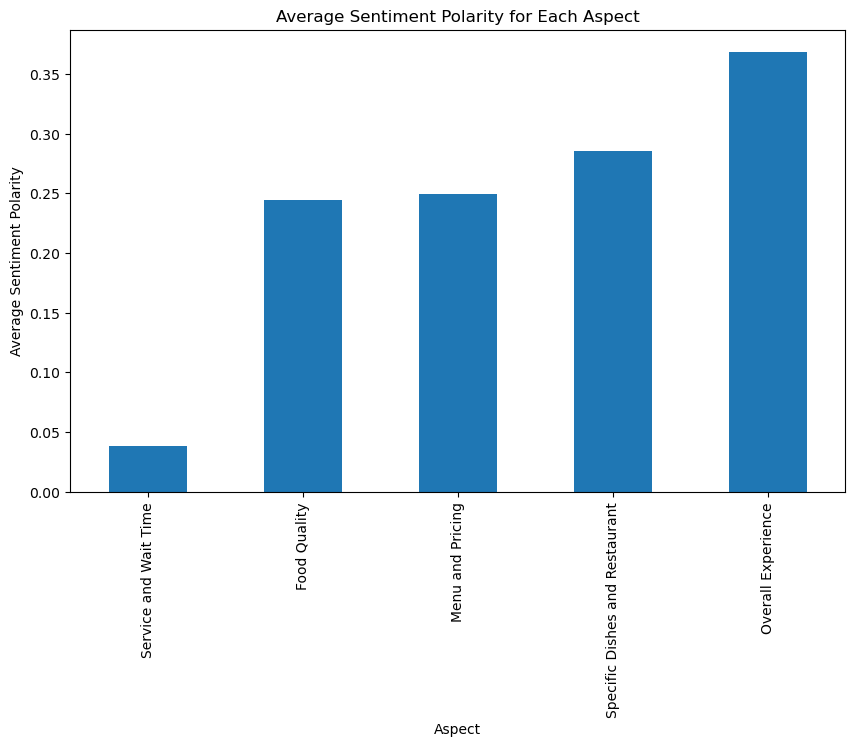

In [70]:
# Calculate the average sentiment polarity for each aspect
aspect_sentiment_avg = df1.groupby('aspect_label')['sentiment_polarity'].mean().sort_values()

# Plot the average sentiment for each aspect
plt.figure(figsize=(10, 6))
aspect_sentiment_avg.plot(kind='bar')
plt.title('Average Sentiment Polarity for Each Aspect')
plt.xlabel('Aspect')
plt.ylabel('Average Sentiment Polarity')
plt.show()


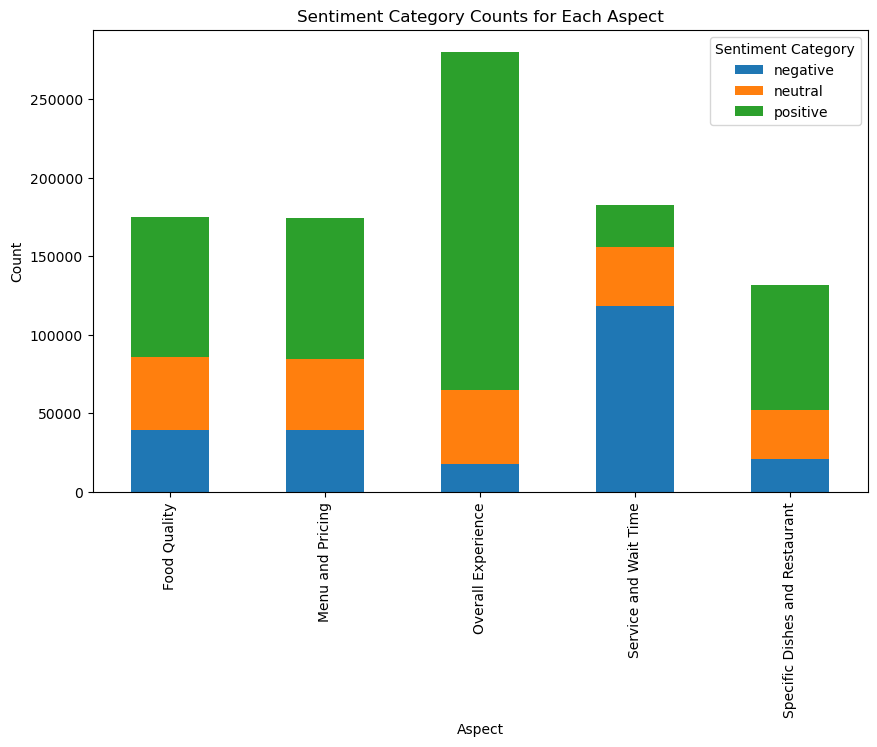

In [71]:
# Count the number of positive, neutral, and negative sentiments for each aspect
aspect_sentiment_counts = df1.groupby('aspect_label')['sentiment_category'].value_counts().unstack().fillna(0)

# Plot the sentiment counts for each aspect
aspect_sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Category Counts for Each Aspect')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.legend(title='Sentiment Category')
plt.show()

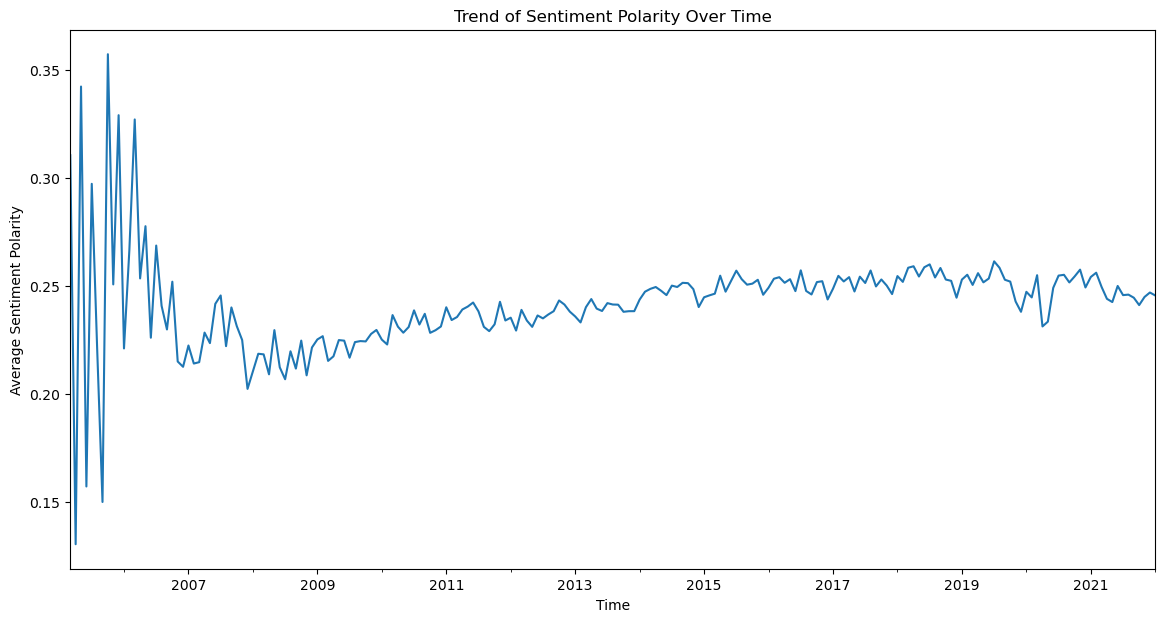

In [72]:
# For trend analysis over time, ensure 'date' is a datetime type
df1['date'] = pd.to_datetime(df1['date'])

# Resample to a larger time frame (e.g., monthly) if needed and calculate the mean sentiment polarity
trend_analysis = df1.resample('M', on='date')['sentiment_polarity'].mean()

# Plot the trend of sentiment polarity over time
plt.figure(figsize=(14, 7))
trend_analysis.plot()
plt.title('Trend of Sentiment Polarity Over Time')
plt.xlabel('Time')
plt.ylabel('Average Sentiment Polarity')
plt.show()


# Phase-1

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944901 entries, 0 to 944900
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review_id           944901 non-null  object 
 1   user_id             944898 non-null  object 
 2   business_id         944898 non-null  object 
 3   stars               944898 non-null  object 
 4   useful              944898 non-null  float64
 5   funny               944898 non-null  float64
 6   cool                944898 non-null  float64
 7   text                944892 non-null  object 
 8   date                944894 non-null  object 
 9   text_no_stop        944883 non-null  object 
 10  text_stemmed        944883 non-null  object 
 11  review_length       944890 non-null  float64
 12  word_count          944890 non-null  float64
 13  aspect              944890 non-null  float64
 14  aspect_label        944890 non-null  object 
 15  sentiment_polarity  944890 non-nul

In [10]:
manual_labeling_subset = df1.sample(frac=0.001, random_state=42)
manual_labeling_subset.to_csv('labeled_subset_LDA.csv', index=False)

# Trial

In [17]:
df1= pd.read_csv("df1_cleaned_sentiment.csv")
df1.head()

/var/folders/5j/qcfnms155kq9pk31c0zqlhp80000gn/T/ipykernel_39218/1622188086.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1= pd.read_csv("df1_cleaned_sentiment.csv")


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_no_stop,text_stemmed,review_length,word_count,aspect,aspect_label,sentiment_polarity
0,T1iMdZeNzNRGB2SW_GYb-Q,Xy_6tT8l0Y5JNrSbL3_4uw,6PCHwjpYRMo1ZvY8m91bIg,3.0,1.0,0.0,0.0,if i were rating this place a few months ago i...,2015-12-29 22:09:28,rating place months ago would 4 5 stars truly ...,rate place month ago would 4 5 star truli stru...,1382.0,276.0,4.0,Specific Dishes and Restaurant,0.223633
1,y4GTzdMEgbMCnLSB3tvnMA,xUinwQIaC7G4B1OhrKJeOw,ALK-7tTvDKAzxAtIiNyh2A,5.0,0.0,0.0,0.0,incredible food really unique combination of f...,2019-11-04 14:47:55,incredible food really unique combination flav...,incred food realli uniqu combin flavor discern...,1256.0,208.0,4.0,Specific Dishes and Restaurant,0.434493
2,3yAQ2Chq47Dpap4nj-kUOg,pTdEM0c4El5cFwVAceLtNg,nqePY399khxYpBBpNjA_zw,5.0,0.0,0.0,0.0,a great local place to get great sandwiches ...,2018-10-15 19:16:29,great local place get great sandwiches may act...,great local place get great sandwich may actua...,157.0,30.0,2.0,Overall Experience,0.441667
3,bs-cfyfjzQRTlT2RFsAHWw,jy9fiTWK-7liefYYkN4KnQ,h_d4fcmFsRFQYmvYaS2bzw,5.0,0.0,0.0,0.0,this is the real deal i sat at the sushi bar ...,2017-11-03 03:11:19,real deal sat sushi bar ordered days nigiri sp...,real deal sat sushi bar order day nigiri speci...,134.0,26.0,3.0,Menu and Pricing,0.225000
4,eZw0IfB9hYOjvigFX16Eeg,9sukFJd_IVRuDEv7MDHl6A,Cjb6F4tUM3B5Z7eV2lhfMg,5.0,0.0,0.0,0.0,great neighborhood sushi place ask for the fat...,2015-05-18 00:34:33,great neighborhood sushi place ask fat boy rol...,great neighborhood sushi place ask fat boy rol...,108.0,21.0,3.0,Menu and Pricing,0.616667


In [18]:
df1 = df1[pd.to_numeric(df1['stars'], errors='coerce').notna()]


df1['stars'] = df1['stars'].astype(float).astype(int)


(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 944894 entries, 0 to 944900
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review_id           944894 non-null  object 
 1   user_id             944894 non-null  object 
 2   business_id         944894 non-null  object 
 3   stars               944894 non-null  int64  
 4   useful              944894 non-null  float64
 5   funny               944894 non-null  float64
 6   cool                944894 non-null  float64
 7   text                944888 non-null  object 
 8   date                944890 non-null  object 
 9   text_no_stop        944883 non-null  object 
 10  text_stemmed        944883 non-null  object 
 11  review_length       944890 non-null  float64
 12  word_count          944890 non-null  float64
 13  aspect              944890 non-null  float64
 14  aspect_label        944890 non-null  object 
 15  sentiment_polarity  944890 non-null  fl

#  Stratified sampling  for manual labelling

In [19]:
import pandas as pd




star_proportions = df1['stars'].value_counts(normalize=True)

sample_sizes = (star_proportions * 600).round().astype(int)

sample = pd.DataFrame()

# Perform the stratified sampling
for star, size in sample_sizes.items():
    star_sample = df1[df1['stars'] == star].sample(n=size, random_state=42)
    sample = pd.concat([sample, star_sample])

# Reset the index of the sample DataFrame
sample = sample.reset_index(drop=True)

# Check the sample size and distribution
print(sample.shape)
print(sample['stars'].value_counts())


(600, 16)
stars
5    264
4    144
1     72
3     69
2     51
Name: count, dtype: int64


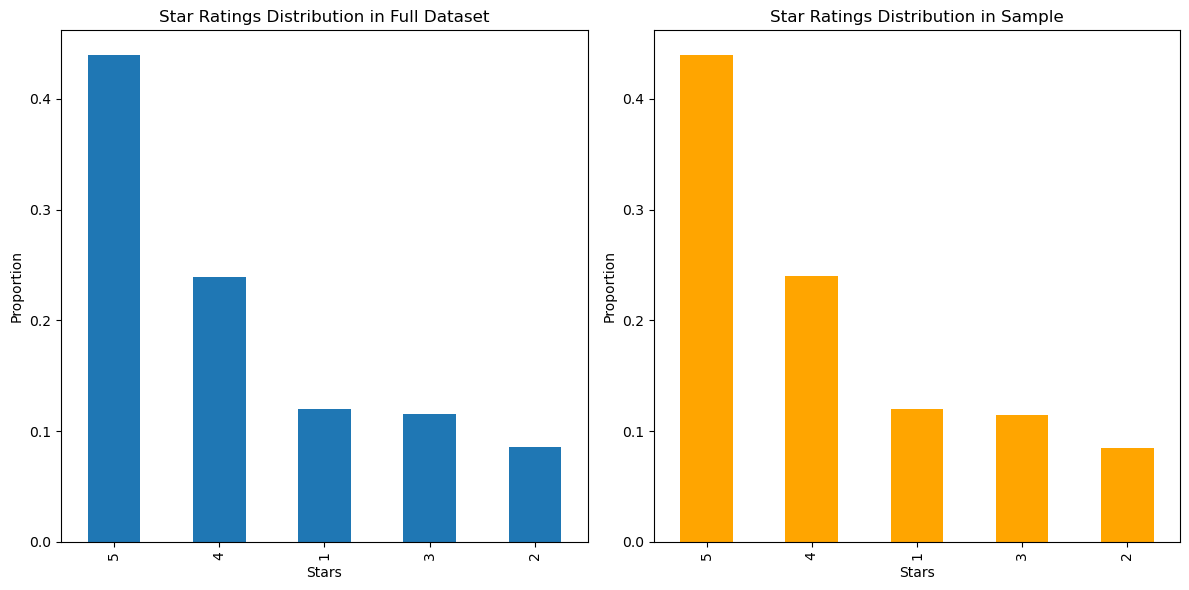

In [20]:
import matplotlib.pyplot as plt


# Distribution in the entire dataset
star_dist_full = df1['stars'].value_counts(normalize=True)

# Distribution in the sample
star_dist_sample = sample['stars'].value_counts(normalize=True)

# Plotting for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
star_dist_full.plot(kind='bar')
plt.title('Star Ratings Distribution in Full Dataset')
plt.xlabel('Stars')
plt.ylabel('Proportion')

plt.subplot(1, 2, 2)
star_dist_sample.plot(kind='bar', color='orange')
plt.title('Star Ratings Distribution in Sample')
plt.xlabel('Stars')
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()


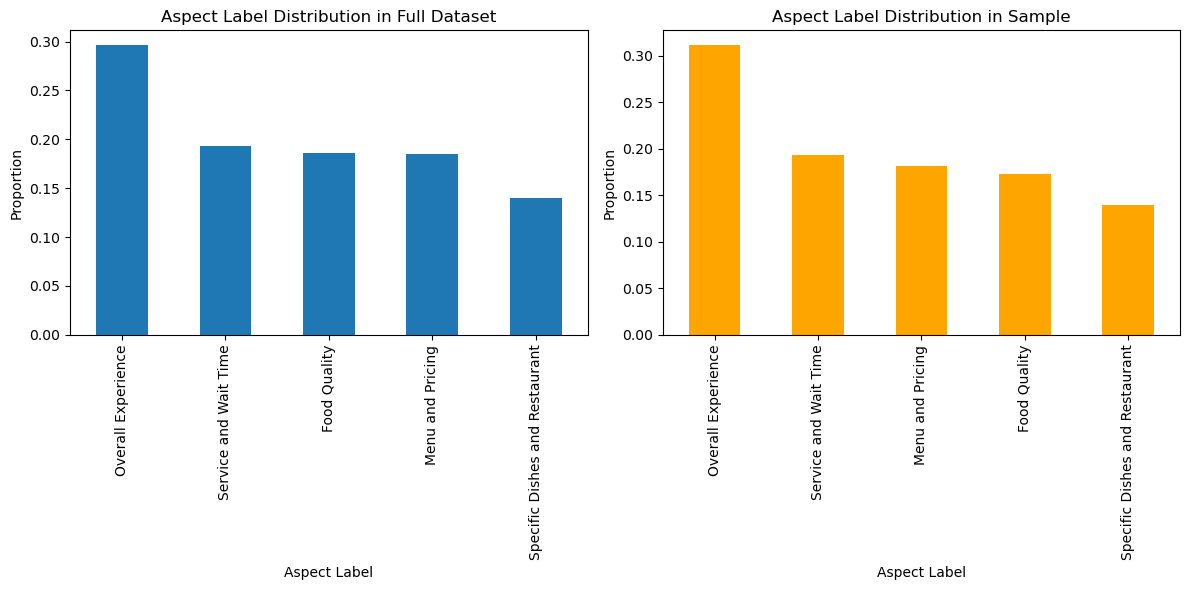

In [21]:
# Aspect Label Distribution in the entire dataset
aspect_dist_full = df1['aspect_label'].value_counts(normalize=True)

# Aspect Label Distribution in the sample
aspect_dist_sample = sample['aspect_label'].value_counts(normalize=True)

# Plotting Aspect Label Distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
aspect_dist_full.plot(kind='bar')
plt.title('Aspect Label Distribution in Full Dataset')
plt.xlabel('Aspect Label')
plt.ylabel('Proportion')

plt.subplot(1, 2, 2)
aspect_dist_sample.plot(kind='bar', color='orange')
plt.title('Aspect Label Distribution in Sample')
plt.xlabel('Aspect Label')
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()


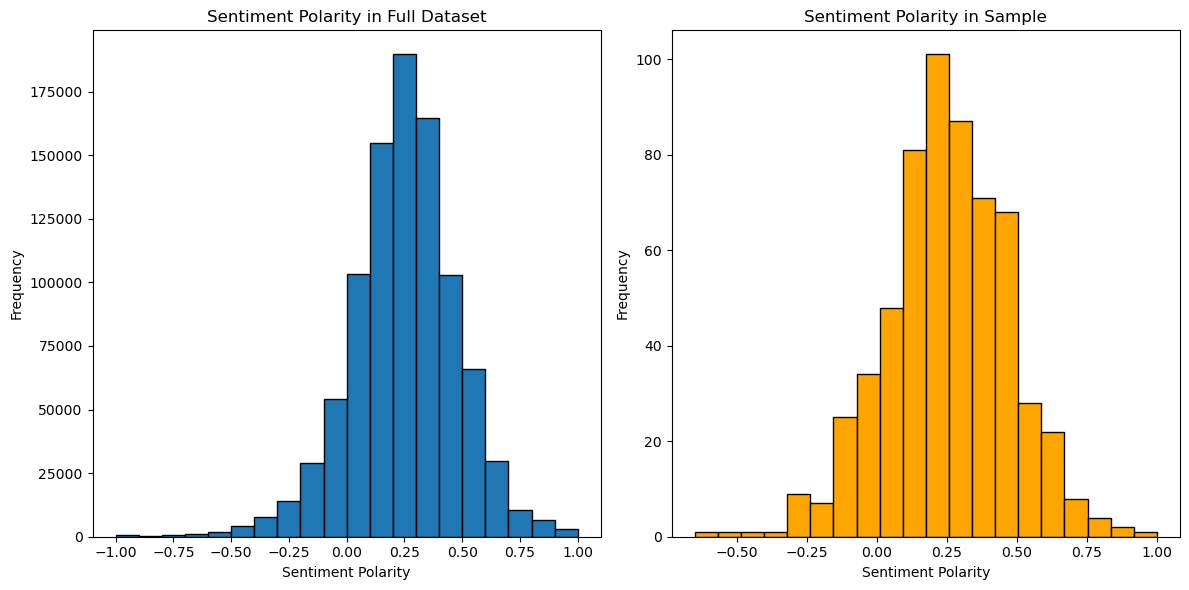

In [23]:
# Plotting Sentiment Polarity Distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df1['sentiment_polarity'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Sentiment Polarity in Full Dataset')
plt.xlabel('Sentiment Polarity')

plt.subplot(1, 2, 2)
sample['sentiment_polarity'].plot(kind='hist', bins=20, color='orange', edgecolor='black')
plt.title('Sentiment Polarity in Sample')
plt.xlabel('Sentiment Polarity')

plt.tight_layout()
plt.show()
